In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Text(0.5, 1.0, 'Variation of House price with number of Bedrooms')

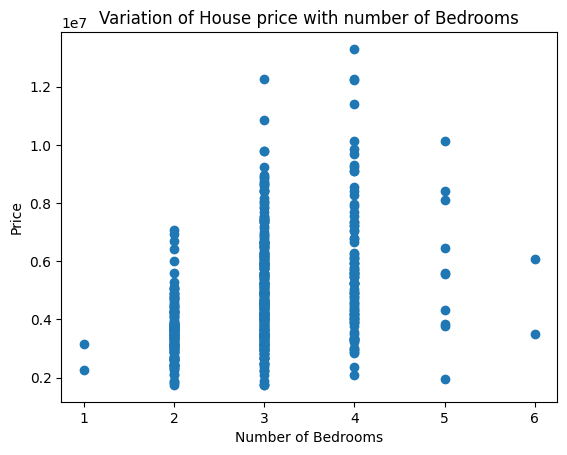

In [19]:
plt.scatter(data[['bedrooms']], data[['price']])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Variation of House price with number of Bedrooms')

Text(0.5, 1.0, 'Variation of House price with number of Bathrooms')

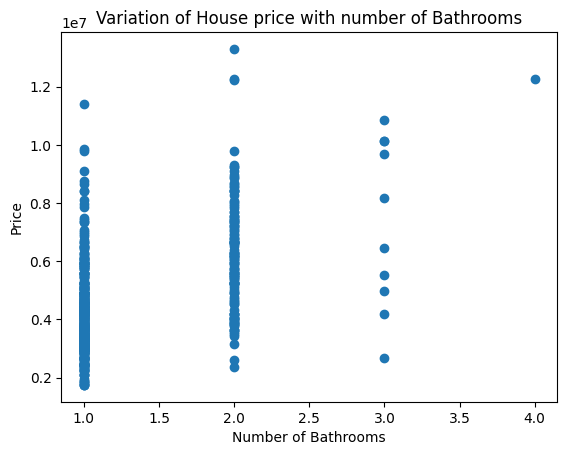

In [20]:
plt.scatter(data[['bathrooms']], data[['price']])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Variation of House price with number of Bathrooms')

Text(0.5, 1.0, 'Variation of House price with Area')

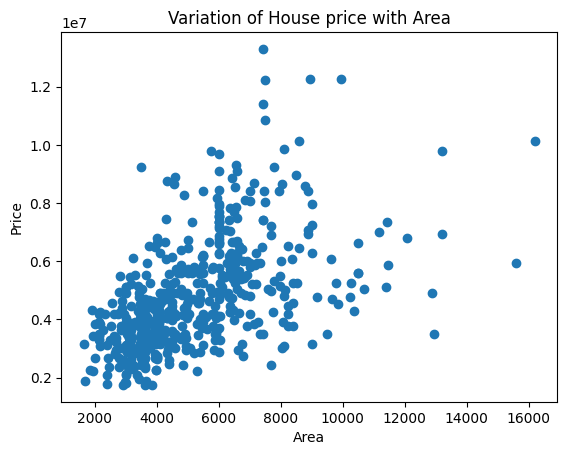

In [21]:
plt.scatter(data[['area']], data[['price']])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Variation of House price with Area')

In [6]:
X=data.iloc[:,1:4]
y=data[['price']]
print(X)
print(y)

     area  bedrooms  bathrooms
0    7420         4          2
1    8960         4          4
2    9960         3          2
3    7500         4          2
4    7420         4          1
..    ...       ...        ...
540  3000         2          1
541  2400         3          1
542  3620         2          1
543  2910         3          1
544  3850         3          1

[545 rows x 3 columns]
        price
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
..        ...
540   1820000
541   1767150
542   1750000
543   1750000
544   1750000

[545 rows x 1 columns]


<ipython-input-7-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

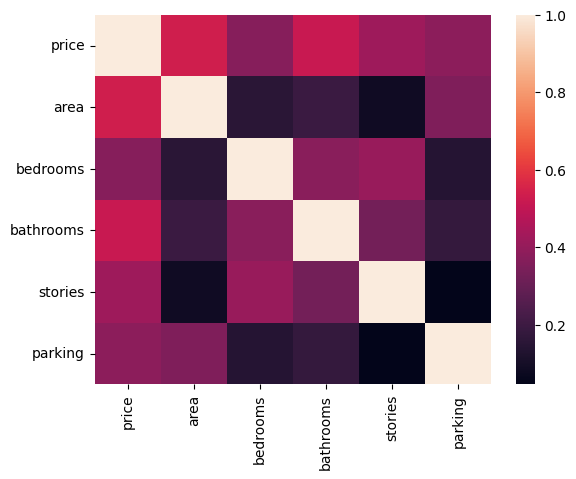

In [7]:
sns.heatmap(data.corr())

In [8]:
from sklearn.model_selection import train_test_split
X = data[["bedrooms","bathrooms","area"]]
y = data["price"]
# print(X)
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(436, 3)
(436,)
(109, 3)
(109,)


In [9]:
from sklearn.preprocessing import StandardScaler
normalizer=StandardScaler()
X_train=normalizer.fit_transform(X_train)
X_test=normalizer.fit_transform(X_test)
# print(X_test)

In [10]:
print(X_train)

[[ 0.05015501 -0.57481377  0.83349552]
 [ 1.41687917 -0.57481377 -0.90135465]
 [ 1.41687917  1.4463056   0.53820188]
 ...
 [-1.31656914 -0.57481377 -0.58299119]
 [ 0.05015501 -0.57481377 -0.64297271]
 [ 1.41687917  1.4463056   0.48929387]]


In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred=regressor.predict(X_test)
# y_pred

In [13]:
print(regressor.coef_)

[297341.74445212 710347.73121154 848746.07492755]


In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4444567183847974

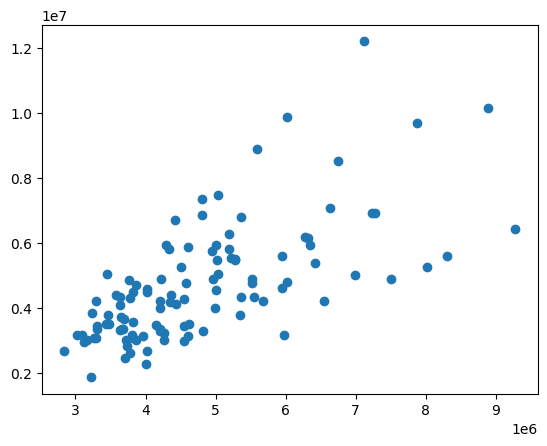

In [15]:
plt.scatter(y_pred, y_test)